In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
##
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
files = ["NOA_control", "NOA_scared", "TYLER_control", "TYLER_scared"]
for i in files:
    data = pd.read_csv(i+".csv", sep="\t")
    del data["0.001 s"] ## deletes blank second column
    data = data.iloc[5:,] ## deletes first five rows
    data=data.reset_index().set_index('index', drop=False) ## creates numeric index
    data.columns = ["Time (sec)", i] ## names column as file
    if i == "NOA_control":
        data = data.iloc[9244:,] ## removes first set of data from NOA control
    data[i] = pd.to_numeric(data[i]) ## sets to int
    vars()[i] = data ## renames to i

In [3]:
tableNOA = pd.merge(NOA_control, NOA_scared, on="Time (sec)")
tableNOA.set_index("Time (sec)", inplace=True)
tableTYLER = pd.merge(TYLER_control, TYLER_scared, on="Time (sec)")
tableTYLER.set_index("Time (sec)", inplace=True)

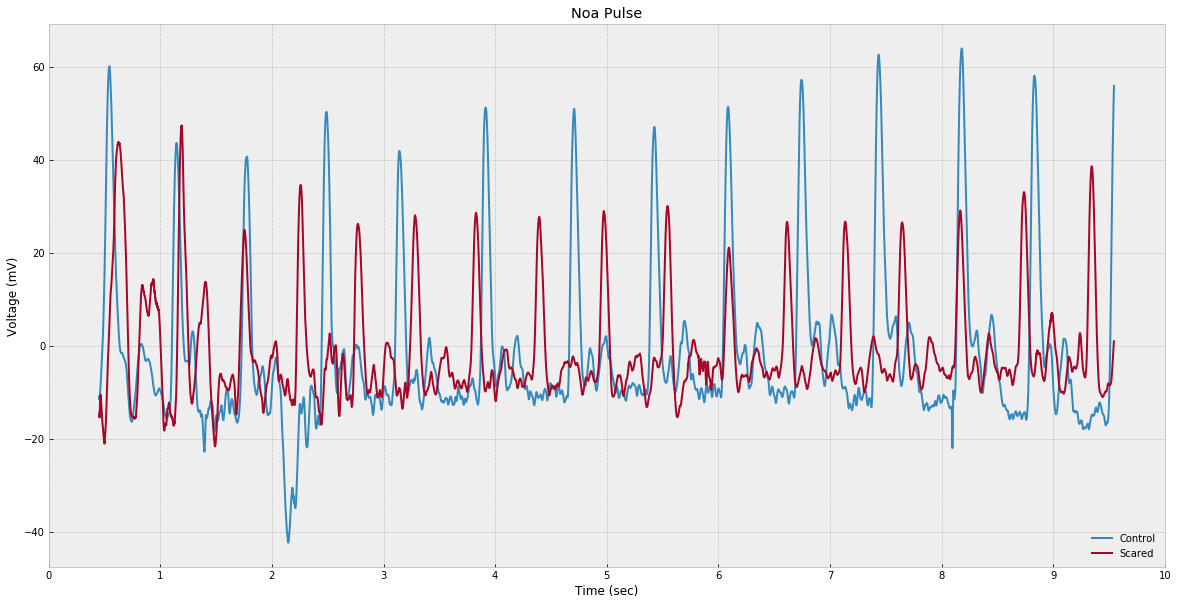

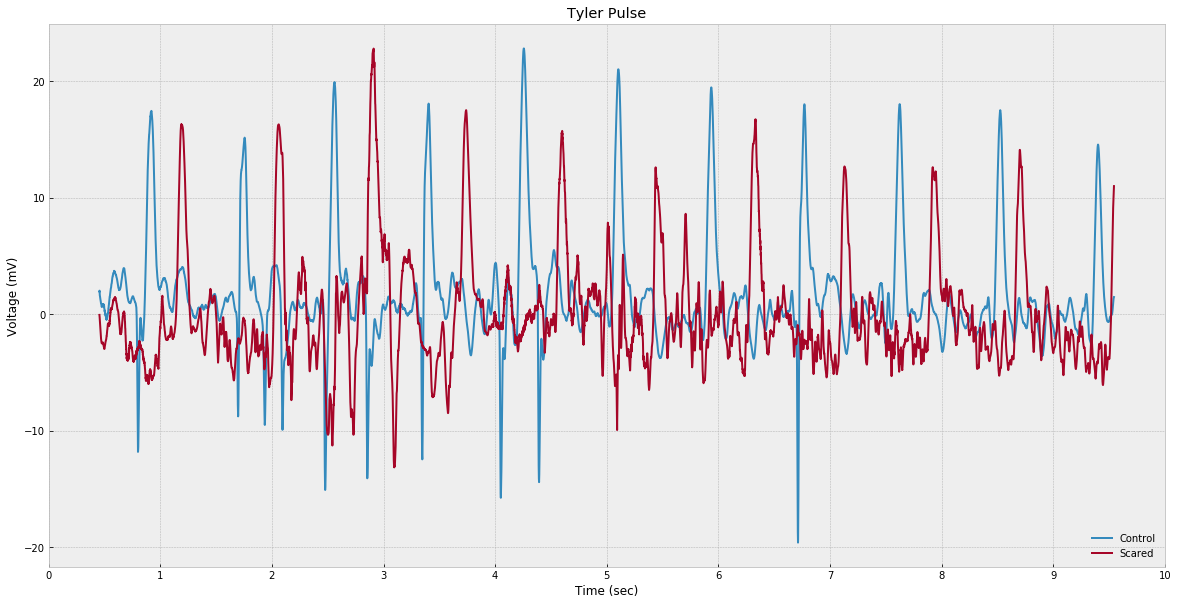

In [4]:
NOA = tableNOA.plot.line(figsize=(20,10))
TYLER = tableTYLER.plot.line(figsize=(20,10))
names = [NOA, TYLER]
for i in names:
    i.legend(["Control","Scared"], ncol=1, loc='lower right', frameon=False);
    i.xaxis.set_major_locator(plt.LinearLocator())
    i.xaxis.set_major_formatter(plt.FixedFormatter([0,1,2,3,4,5,6,7,8,9,10]))
    i.set_ylabel("Voltage (mV)")
    if i == NOA:
        i.set_title("Noa Pulse")
    elif i == TYLER:
        i.set_title("Tyler Pulse")